<span style="font-size:large;">
<div style="text-align: right">CSTS-UH 1078 <b>Networks</b><br/>
Faculty: <b>Moses Boudourides</b><br/>
Fall Semester 2019<br/>
New York University Abu Dhabi</div>

## <span style="color:red">EXPERIMENT 12</span>
# <span style="color:green">Word-Net from Gilles Deleuze's "*Difference and Repetition*"

### Importing Python Modules 

In [1]:
import random, pickle, itertools, operator, math
import nltk
import codecs
import numpy as np
from textblob import TextBlob
import networkx as nx
import community
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import pandas as pd
from collections import Counter
import imp
import os
os.chdir("/Volumes/LaCie/WorkPlaces/Python Projects 2/2 NYUAD Networks/CourseNotebooks/Utilities/")
from utils import *
import tools as tool
from chAs import draw_comms, modul_arity
from ipywidgets import widgets
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
%load_ext autoreload

## I. Importing the Text of Deleuze's *Difference and Repetition*

In [2]:
filename = 'Deleuze_Difference&Repetition_1.txt' 
titlename = "Deleuze's Difference and Repetition"
stitlename = "Deleuze_Difference&Repetition"

f = codecs.open(filename, "r", encoding="utf-8").readlines()

num_lines = 0
num_words = 0
num_chars = 0
for line in f:
    words = line.split()
    num_lines += 1
    num_words += len(words)
    num_chars += len(line)
print "%s has number of words = %i (and number of characters/symbols = %i)" %(titlename,num_words,num_chars)
# print "%s has number of words = %i" %(titlename,num_words)
blob = TextBlob("\n".join(f))

Deleuze's Difference and Repetition has number of words = 156300 (and number of characters/symbols = 957289)


## II. The Essential Terms in Deleuze's "*Difference and Repetition*"

### Essential Terms = Parr's Philosophical terms + Extracted Names

In [4]:
# dterms=['active','actuality','affect','arborescent schema','architecture','art','Artaud','assemblage','axiomatic','Bacon','Beckett','becoming','Bergson','black hole','body','body without organs','Breuer','Burroughs','bwo','Canguilhem','capitalism','capture','Carroll','chaos','cinema','cogito','concept','control society','creative transformation',u'C\xc3\x89zanne','death','Derrida','Descartes','desire','deterritorialisation','diagram','difference','differenciation','differentiation','disjunctive synthesis','duration',u'dur\xc3\x89e','earth','ecology','eternal return','ethics','ethics of joy','event','experience','experimentation','expression','exteriority','fabulation','faciality','family','fascism','feminism','fold','force','Foucault','freedom','Freud','genealogy','geography','Guattari','haecceity','Hardy','Hegel','Heidegger','Hume','identity','image','immanence','incorporeal','individuation','intensity','interiority','intuition','Kafka','Kant','Klee','Lacan','Lamarck','Leibniz','lines of flight',u'L\xc3\x89vinas','majoritarian','Marx','materialism','memory','Merleau-Ponty','micropolitics','minor literature','minoritarian','molar','molecular','movement-image','multiplicity','Negri','Nietzsche','nomadicism','nomos','nonbeing','noology','oedipalisation','ontology','order-word','organism','partial object','percept','performance','phenomenology','plateau','Plato','post-structuralism','power','Proust','psychoanalysis','reactive','real','Reich','repetition','representation','repression','reterritorialisation','revolution','rhizome','Sacher-Masoch','Sartre','Saussure','schizoanalysis','schizophrenia','semiotics','sensation','signified','signifier','Simondon','simulacrum','singularity','smooth','socius','space','Spinoza','state','stratification','subjectivity','substance','suicide','technology','territory','theory','thought','time','transcendental empiricism','transversality','truth',u'Uexk\xc3\x9cll','unconscious','univocal','utopia','variation','virtual','Whitehead','whole','woman','Woolf','writing']
dterms=['active','actuality','affect','arborescent schema','architecture','art','Artaud','assemblage','axiomatic','Bacon','Beckett','becoming','Bergson','black hole','body','body without organs','Breuer','Burroughs','bwo','Canguilhem','capitalism','capture','Carroll','chaos','cinema','cogito','concept','consciousness','control','creative transformation',u'Cezanne','death','Derrida','Descartes','desire','deterritorialisation','diagram','difference','differenciation','differentiation','disjunctive synthesis','duration',u'duree','earth','ecology','eternal return','ethics','ethics of joy','event','existence','experience','experimentation','expression','exteriority','extensive','fabulation','faciality','family','fascism','feminism','fold','force','Foucault','freedom','Freud','genealogy','geography','Guattari','haecceity','Hardy','Hegel','Heidegger','Hume','identity','image','immanence','incorporeal','individuation','intensity','intensive','interiority','intuition','Kafka','Kant','Klee','Lacan','Lamarck','Leibniz','lines of flight',u'Levinas','majoritarian','Marx','materialism','memory','Merleau-Ponty','micropolitics','minor literature','minoritarian','molar','molecular','movement-image','multiplicity','Negri','Nietzsche','nomadicism','nomos','nonbeing','noology','oedipalisation','ontology','order-word','organism','partial object','percept','performance','phenomenology','plateau','Plato','post-structuralism','power','Proust','psychoanalysis','reactive','real','Reich','repetition','representation','repression','reterritorialisation','revolution','rhizome','Sacher-Masoch','Sartre','Saussure','schizoanalysis','schizophrenia','semiotics','sensation','signified','signifier','Simondon','simulacrum','singularity','smooth','society','socius','space','Spinoza','state','stratification','subjectivity','substance','suicide','technology','territory','theory','thought','time','transcendental empiricism','transversality','truth',u'Uexkull','unconscious','univocal','utopia','variation','virtual','Whitehead','whole','woman','Woolf','writing']
dterms=[x.encode('utf-8') for x in dterms]
print len(dterms), len(set(dterms))
print
sorted(dterms)
# plname0="ParrTDD.pic"
# pterms = pickle.load(open(plname0,"rb"))

172 172



['Artaud',
 'Bacon',
 'Beckett',
 'Bergson',
 'Breuer',
 'Burroughs',
 'Canguilhem',
 'Carroll',
 'Cezanne',
 'Derrida',
 'Descartes',
 'Foucault',
 'Freud',
 'Guattari',
 'Hardy',
 'Hegel',
 'Heidegger',
 'Hume',
 'Kafka',
 'Kant',
 'Klee',
 'Lacan',
 'Lamarck',
 'Leibniz',
 'Levinas',
 'Marx',
 'Merleau-Ponty',
 'Negri',
 'Nietzsche',
 'Plato',
 'Proust',
 'Reich',
 'Sacher-Masoch',
 'Sartre',
 'Saussure',
 'Simondon',
 'Spinoza',
 'Uexkull',
 'Whitehead',
 'Woolf',
 'active',
 'actuality',
 'affect',
 'arborescent schema',
 'architecture',
 'art',
 'assemblage',
 'axiomatic',
 'becoming',
 'black hole',
 'body',
 'body without organs',
 'bwo',
 'capitalism',
 'capture',
 'chaos',
 'cinema',
 'cogito',
 'concept',
 'consciousness',
 'control',
 'creative transformation',
 'death',
 'desire',
 'deterritorialisation',
 'diagram',
 'difference',
 'differenciation',
 'differentiation',
 'disjunctive synthesis',
 'duration',
 'duree',
 'earth',
 'ecology',
 'eternal return',
 'ethics',
 '

In [5]:
names=[u'Abel',u'Actaeon',u'Adam',u'Aegester',u'Albertine',u'Alice',u'Alleman',u'Ananke',u'Antigone',u'Apollo',u'Apolloniac',u'Ariadne',u'Arnaud',u'Arnauld',u'Artaud',u'Baer',u'Ballanche',u'Baudelaire',u'Bayreuth',u'Bergson',u'Binswanger',u'Bizet',u'Bliss',u'Bloy',u'Bonaparte',u'Bordas',u'Borges',u'Borgia',u'Buchner',u'Butler',u'Butor',u'Caesar',u'Cagitatia',u'Carnot',u'Carroll',u'Chatelier',u'Christ',u'Claimant',u'Clausius',u'Cohen',u'Comb',u'Combray',u'Condillac',u'Copenhagen',u'Curie',u'Cuvier',u'Dalcq',u'Danton',u'Darwin',u'Dedekind',u'Democritus',u'Demoulin',u'Descartes',u'Deucalion',u'Didot',u'Dionysus',u'Dogons',u'Dora',u'Dostoyevsky',u'Dwells',u'Empedocles',u'Ennead',u'Epicurus',u'Euclid',u'Eudaxus',u'Eudoxus',u'Evanston',u'Fang',u'Faure',u'Fechner',u'Ferenczi',u'Fichte',u'Finnegans',u'Flaubert',u'Flora',u'Foucault',u'Freud',u'Gervaise',u'God',u'Gogol',u'Gombrowicz',u'Grace',u'Gradiva',u'Griaule',u'Hamlet',u'Harper',u'Heidegger',u'Heraclitus',u'Hercules',u'Hermann',u'Herodotus',u'Saint-Hilaire',u'Hippias',u'Hofstadter',u'Holderlin',u'Houe',u'Hudson',u'Hume',u'Husserl',u'Joan of Arc',u'Job',u'Jordanons',u'Joyce',u'Kant',u'Lagrange',u'Lalande',u'Lautman',u'Leech',u'Leibniz',u'Lenin',u'Levi-Strauss',u'Linnaeons',u'Lucretius',u'Luther',u'Maimon',u'Maldiney',u'Malick',u'Mallarme',u'Malmon',u'Malone',u'Marienbad',u'Marx',u'Meno',u'Merleau-Ponty',u'Molloy',u'Monet',u'Mozart',u'Murphy',u'Nachfolge',u'Napoleon',u'Narcissus',u'Nerval',u'Newton',u'Nietzsche',u'Nogue',u'Novalis',u'Odette',u'Odyssey',u'Oedipus',u'Overman',u'Oxoniense',u'Paliard',u'Parmenides',u'Parsifal',u'Pecuchet',u'Peguy',u'Perrier',u'Phaedo',u'Phaedrus',u'Philebus',u'Pius Servien',u'Plato',u'Plotinus',u'Poe',u'Polonius',u'Saint-Preux',u'Proust',u'Pruss',u'Redon',u'Resartus',u'Ricoeur',u'Rieder',u'Rimbaud',u'Rosny',u'Roussel',u'Ruyer',u'Salomon',u'Sartor',u'Sartre',u'Saussure',u'Schopenhauer',u'Scotus',u'Selme',u'Servien',u'Shestov',u'Simondon',u'Socrates',u'Sorbonne',u'Sphinx',u'Spinoza',u'Stambaugh',u'Swann',u'Tarde',u'Taylor',u'Thames',u'Theaetetus',u'Theodorus',u'Theseus',u'Timaeus',u'Trubetzkoy',u'Ulysses',u'Vialleton',u'Vico',u'Villiers',u'Vitrac',u'Vuillemin',u'Wagner',u'Warhol',u'Watteau',u'Weissmann',u'Whitehead',u'Wolmar',u'Wozzeck',u'Zarathustra',u'Zeus']
print len(names)

205


In [6]:
pn=set([p for p in dterms]).intersection(set(names))
print len(pn)
print pn
pterms=[p for p in dterms if p not in pn]
allterms=pterms+names
print len(pterms), len(names), len(allterms)

20
set(['Whitehead', 'Nietzsche', 'Descartes', 'Saussure', 'Simondon', 'Leibniz', 'Plato', 'Carroll', 'Freud', 'Heidegger', 'Spinoza', 'Merleau-Ponty', 'Artaud', 'Sartre', 'Proust', 'Kant', 'Foucault', 'Marx', 'Bergson', 'Hume'])
152 205 357


In [7]:
all_sents=blob.sentences
occurdic=Counter()
for sen in all_sents:
    dd=sen.dict
#     print dd[u'stripped']
# #     for np in dd['noun_phrases']:
    for term in allterms:
        if term.lower() in dd[u'stripped']:
            occurdic[term]+=1

df = pd.DataFrame(columns=["%s Essential Terms" %titlename, "Frequencies"])
u=1
for l,v in occurdic.items(): 
    df.loc[u]=[l,v]
    u+=1

print "The total number of essential terms in %s is %i." %(titlename,len(df))#len(npA))
df.sort_values(["Frequencies"], ascending=[0])

# cut = 0
# df = df[df['Frequencies']>cut].sort_values(["Frequencies"], ascending=[0])
# print "The total number of essential terms in %s with frequencies > %i is %i." %(titlename,cut,len(df))#len(npA))
df.sort_values(["Frequencies"], ascending=[0])

The total number of essential terms in Deleuze's Difference and Repetition is 290.


,Deleuze's Difference and Repetition Essential Terms,Frequencies
52,difference,936
203,repetition,602
162,art,540
284,time,403
3,concept,363
286,representation,318
281,thought,282
38,real,253
274,identity,251
113,power,202


In [8]:
sendic=dict()
for i,v in enumerate(all_sents):
    dd=v.dict
    wl=[]
    for term in allterms:
        term=term.lower()
        if term in dd[u'stripped'].split():
            if term not in wl:
                wl.append(term)
    wwl=[]
    for w in wl:
        if w in pterms:
            if w not in wwl:
                wwl.append(w)
        else:
            if w.title() not in wwl:
                wwl.append(w.title())
    sendic[i]=wwl
sendic

{0: ['difference', 'repetition'],
 1: ['repetition'],
 2: [],
 3: ['repetition'],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: ['repetition'],
 10: ['repetition'],
 11: [],
 12: ['real'],
 13: ['repetition'],
 14: ['difference'],
 15: [],
 16: ['repetition'],
 17: [],
 18: ['power', 'time'],
 19: ['power', 'repetition', u'Peguy'],
 20: ['repetition'],
 21: ['art', 'concept', 'difference', 'repetition', 'singularity'],
 22: ['repetition'],
 23: ['repetition'],
 24: [u'Servien'],
 25: ['repetition'],
 26: [],
 27: [],
 28: [],
 29: ['repetition'],
 30: [],
 31: ['difference', 'variation'],
 32: [],
 33: ['repetition'],
 34: [],
 35: [],
 36: [],
 37: ['space', u'Faure', u'Watteau'],
 38: [],
 39: ['repetition', u'Wolmar'],
 40: [],
 41: ['repetition'],
 42: ['repetition'],
 43: [],
 44: ['power', 'repetition'],
 45: ['difference', 'repetition', 'singularity', 'variation'],
 46: ['repetition'],
 47: [],
 48: ['repetition'],
 49: ['experimentation', 'repetition'],
 50: ['state'],
 51: ['exp

In [9]:
eds=[]
for k,v in sendic.items():
    if len(v)>2:
        for j in list(itertools.combinations(v, 2)):
            eds.append((j[0],j[1],k))
eds

[('power', 'repetition', 19),
 ('power', u'Peguy', 19),
 ('repetition', u'Peguy', 19),
 ('art', 'concept', 21),
 ('art', 'difference', 21),
 ('art', 'repetition', 21),
 ('art', 'singularity', 21),
 ('concept', 'difference', 21),
 ('concept', 'repetition', 21),
 ('concept', 'singularity', 21),
 ('difference', 'repetition', 21),
 ('difference', 'singularity', 21),
 ('repetition', 'singularity', 21),
 ('space', u'Faure', 37),
 ('space', u'Watteau', 37),
 (u'Faure', u'Watteau', 37),
 ('difference', 'repetition', 45),
 ('difference', 'singularity', 45),
 ('difference', 'variation', 45),
 ('repetition', 'singularity', 45),
 ('repetition', 'variation', 45),
 ('singularity', 'variation', 45),
 ('experimentation', 'space', 51),
 ('experimentation', 'time', 51),
 ('space', 'time', 51),
 ('power', 'repetition', 62),
 ('power', 'time', 62),
 ('repetition', 'time', 62),
 ('difference', 'repetition', 67),
 ('difference', u'Buchner', 67),
 ('difference', u'Danton', 67),
 ('repetition', u'Buchner', 67

In [10]:
G=nx.MultiGraph()
htw=[]
for k,v in dict(Counter(eds)).items():
    G.add_edge(k[0],k[1],weight=v,sent=k[2])
# print "The multigraph of conflicts has"
print len(G.nodes()), "nodes and" 
print len(G.edges()), "edges"
pactors=[n for n in G.nodes() if n in pterms]
nactors=[n for n in G.nodes() if n not in pterms]
print len(pactors)
print pactors
print len(nactors)
print nactors
if nx.is_connected(G)==True:
    print "This graph is connected"
else:
    print "This graph is not connected and has", nx.number_connected_components(G), "connected components"

192 nodes and
2738 edges
77
['concept', 'Lacan', 'consciousness', 'univocal', 'differentiation', 'earth', 'death', 'interiority', 'intensive', 'nonbeing', 'plateau', 'real', 'desire', 'phenomenology', 'affect', 'singularity', 'difference', 'materialism', 'truth', 'Beckett', 'revolution', 'force', 'sensation', 'society', 'intensity', 'existence', 'duration', 'event', 'power', 'space', 'chaos', 'repression', 'state', 'exteriority', 'theory', 'unconscious', 'ontology', 'substance', 'freedom', 'experience', 'expression', 'intuition', 'cogito', 'family', 'image', 'individuation', 'active', 'axiomatic', 'art', 'writing', 'experimentation', 'differenciation', 'immanence', 'memory', 'signified', 'becoming', 'body', 'Hegel', 'repetition', 'extensive', 'fold', 'multiplicity', 'schizophrenia', 'cinema', 'psychoanalysis', 'simulacrum', 'capture', 'virtual', 'actuality', 'time', 'variation', 'ethics', 'identity', 'whole', 'thought', 'representation', 'organism']
115
[u'Theseus', u'Finnegans', u'Peg

In [11]:
G.edges(data=True)

MultiEdgeDataView([(u'Theseus', u'Dionysus', {'weight': 1, 'sent': 5155}), (u'Theseus', 'difference', {'weight': 1, 'sent': 5155}), (u'Theseus', u'Ariadne', {'weight': 1, 'sent': 5155}), ('concept', 'intuition', {'weight': 1, 'sent': 3238}), ('concept', 'intuition', {'weight': 1, 'sent': 3250}), ('concept', 'intuition', {'weight': 1, 'sent': 3235}), ('concept', 'intuition', {'weight': 1, 'sent': 3249}), ('concept', 'revolution', {'weight': 1, 'sent': 798}), ('concept', 'force', {'weight': 1, 'sent': 5356}), ('concept', 'force', {'weight': 1, 'sent': 5410}), ('concept', 'consciousness', {'weight': 1, 'sent': 5070}), ('concept', u'Bonaparte', {'weight': 1, 'sent': 1786}), ('concept', u'God', {'weight': 1, 'sent': 1136}), ('concept', 'image', {'weight': 1, 'sent': 2618}), ('concept', 'image', {'weight': 1, 'sent': 5524}), ('concept', u'Plato', {'weight': 1, 'sent': 1145}), ('concept', 'intensity', {'weight': 1, 'sent': 4994}), ('concept', u'Maimon', {'weight': 1, 'sent': 3235}), ('concept

In [12]:
partition = community.best_partition(G)
minima = min(partition.values())
maxima = max(partition.values())
norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.tab10) #Set3
ppartition=dict()
for k,v in partition.items():
    c=mapper.to_rgba(v)
    ppartition[k]=c
kk=len(set(partition.values()))
print 'The graph has', kk, 'communities'
cml=[]
for j in range(kk):
    cj=[]
    for k,v in partition.items():
        if v==j:
            cj.append(k)
    cml.append(cj)
cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
for i in eocmd:
    print 'Community', i[0], 'with', i[1][1], 'nodes:', i[1][0]

The graph has 7 communities
Community 0 with 53 nodes: ('consciousness', 'death', u'Swann', u'Dora', u'Epicurus', 'materialism', 'truth', u'Watteau', u'Novalis', 'sensation', u'Marienbad', 'space', u'Zeus', 'repression', u'Aegester', u'Resartus', u'Ferenczi', 'unconscious', u'Wozzeck', u'Roussel', u'Theaetetus', u'Herodotus', u'Theodorus', u'Heidegger', u'Odette', 'whole', 'cogito', u'Ricoeur', u'Sartor', 'active', u'Bliss', u'Fechner', 'experimentation', 'art', u'Zarathustra', 'memory', 'signified', u'Comb', 'freedom', u'Freud', 'fold', u'Albertine', u'Hamlet', u'Rieder', u'Alleman', 'cinema', u'Rimbaud', 'psychoanalysis', 'simulacrum', 'capture', u'Faure', u'Holderlin', 'time')
Community 1 with 43 nodes: (u'Peguy', 'univocal', u'Eudoxus', u'Plato', 'intensive', u'Adam', 'singularity', u'Pecuchet', u'Baudelaire', u'Bonaparte', u'Fichte', 'theory', u'Arnauld', 'substance', u'Leibniz', 'experience', u'Kant', 'family', 'image', u'Sorbonne', 'individuation', u'Phaedo', u'Flaubert', u'Oxon

[(0.12156862745098039, 0.46666666666666667, 0.70588235294117652, 1.0), (1.0, 0.49803921568627452, 0.054901960784313725, 1.0), (0.83921568627450982, 0.15294117647058825, 0.15686274509803921, 1.0), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0), (0.8901960784313725, 0.46666666666666667, 0.76078431372549016, 1.0), (0.73725490196078436, 0.74117647058823533, 0.13333333333333333, 1.0), (0.090196078431372548, 0.74509803921568629, 0.81176470588235294, 1.0)]


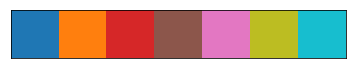

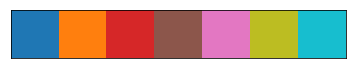

In [13]:
def show_colors(colors):
    """
    Draw a square for each color contained in the colors list
    given in argument.
    """
    with plt.rc_context(plt.rcParamsDefault):
        fig = plt.figure(figsize=(6, 1), frameon=False)
        ax = fig.add_subplot(111)
        for x, color in enumerate(colors):
            ax.add_patch(
                mpl.patches.Rectangle(
                    (x, 0), 1, 1, facecolor=color
                )
            )
        ax.set_xlim((0, len(colors)))
        ax.set_ylim((0, 1))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect("equal")
    
    return fig

minima = min(partition.values())
maxima = max(partition.values())
norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.tab10) #Pastel2 Set3) #viridis) #Greys_r)
colors=[]
for v in partition.values():
    c=mapper.to_rgba(v)
    if c not in colors:
        colors.append(c)
print colors
show_colors(colors)

In [31]:
cmms=[]
for i in cmd.keys():
    cmms.append(list(i))

ppartition0=dict()
for k,v in ppartition.items():
    if k in cmms[0]:
        ppartition0[k]=v
ppartition1=dict()
for k,v in ppartition.items():
    if k in cmms[1]:
        ppartition1[k]=v
ppartition2=dict()
for k,v in ppartition.items():
    if k in cmms[2]:
        ppartition2[k]=v
ppartition3=dict()
for k,v in ppartition.items():
    if k in cmms[3]:
        ppartition3[k]=v
ppartition4=dict()
for k,v in ppartition.items():
    if k in cmms[4]:
        ppartition4[k]=v
ppartition5=dict()
for k,v in ppartition.items():
    if k in cmms[5]:
        ppartition5[k]=v
ppartition6=dict()
for k,v in ppartition.items():
    if k in cmms[6]:
        ppartition6[k]=v

pos=nx.circular_layout(nx.cycle_graph(len(cmms)))

G0=G.subgraph(cmms[0])
pos0=nx.circular_layout(G0)
G1=G.subgraph(cmms[1])
pos1=nx.spring_layout(G1,scale=1.,k=1.5)
# pos1=nx.circular_layout(G1)
G2=G.subgraph(cmms[2])
pos2=nx.spring_layout(G2,scale=1.,k=.2)
# pos2=nx.circular_layout(G2)
G3=G.subgraph(cmms[3])
pos3=nx.spring_layout(G3,scale=1.,k=1.5)
# pos3=nx.circular_layout(G3)
G4=G.subgraph(cmms[4])
pos4=nx.circular_layout(G4)
G5=G.subgraph(cmms[5])
pos5=nx.spring_layout(G5,scale=1.,k=1.5)
# pos5=nx.circular_layout(G5)
G6=G.subgraph(cmms[6])
pos6=nx.circular_layout(G6)

centers=pos.values()
centerm=[]
for i in range(len(centers)):
    t=[]
    for j in centers[i]:
        t.append(j*3)
    centerm.append(np.array(t))
centers=centerm
radius=1. #1.5

def re_pos(pos,centre,radius):
    plist=[list(v) for v in pos.values()]
    nplist=[v for v in pos.values()]
    x = [p[0] for p in plist]
    y = [p[1] for p in plist]
    centroid = (sum(x) / float(len(plist)), sum(y) / float(len(plist)))
    ncentroid=np.array(centroid)
    rad=max([np.linalg.norm(nplist[i]-ncentroid) for i in range(len(nplist))])
    rpos={}
    for k,v in pos.items():
        rpos[k]=[(v[0]+centre[0])/float(radius),(v[1]+centre[1])/float(radius)]
    return rpos

pos0=re_pos(pos0,centers[0],radius)
pos1=re_pos(pos1,centers[1],radius*0.8)
pos2=re_pos(pos2,centers[2],radius)
pos3=re_pos(pos3,centers[3],radius*0.9)
pos4=re_pos(pos4,centers[4],radius)
pos5=re_pos(pos5,centers[5],radius*0.9)
pos6=re_pos(pos6,centers[6],radius)

posAll=dict(pos0.items()+pos1.items()+pos2.items()+pos3.items()+pos4.items()+pos5.items()+pos6.items()+[(k,pos0[k]+pos1[k]+pos2[k]+pos3[k]+pos4[k]+pos5[k]+pos6[k]) for k in set(pos6)&set(pos5)&set(pos4)&set(pos3)&set(pos2)&set(pos1)&set(pos0)])

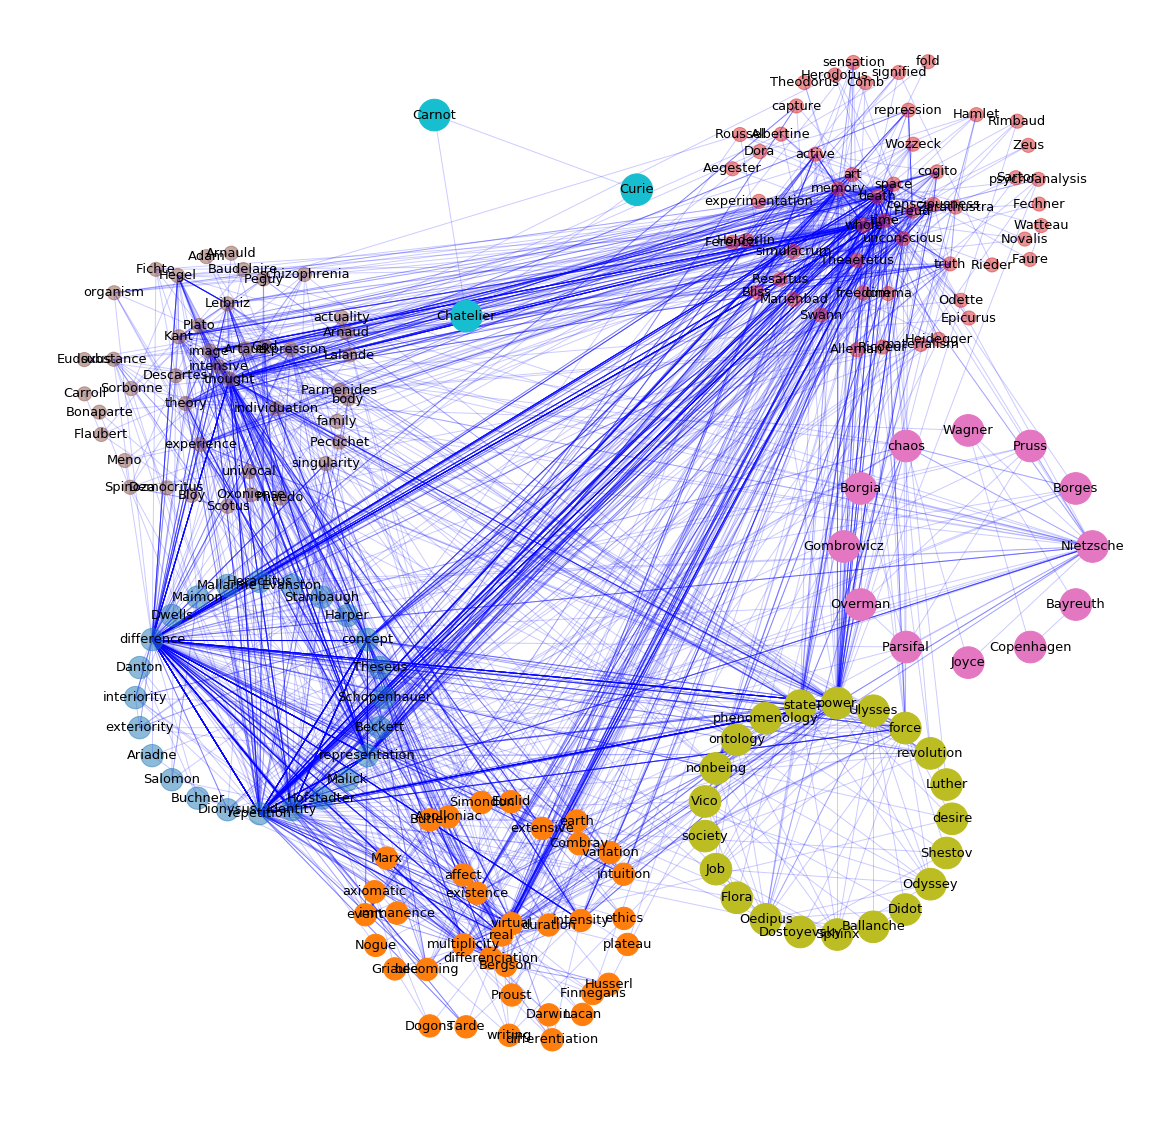

In [32]:
plt.figure(figsize=(20,20))

edgewidth=[]
for (u,v,d) in G.edges(data=True):
    edgewidth.append(d['weight']) #1+math.log(
    
labels={}
for i in G.nodes():
    labels[i]=i

nx.draw_networkx_nodes(G0,pos=pos0,node_size=1000,nodelist=cmms[0],node_color=ppartition0.values(),font_size=20,alpha=1.);
nx.draw_networkx_nodes(G1,pos=pos1,node_size=200,nodelist=cmms[1],node_color=ppartition1.values(),font_size=20,alpha=0.5);
nx.draw_networkx_nodes(G2,pos=pos2,node_size=1000,nodelist=cmms[2],node_color=ppartition2.values(),font_size=20,alpha=1.);
nx.draw_networkx_nodes(G3,pos=pos3,node_size=200,nodelist=cmms[3],node_color=ppartition3.values(),font_size=20,alpha=0.5);
nx.draw_networkx_nodes(G4,pos=pos4,node_size=500,nodelist=cmms[4],node_color=ppartition4.values(),font_size=20,alpha=0.5);
nx.draw_networkx_nodes(G5,pos=pos5,node_size=500,nodelist=cmms[5],node_color=ppartition5.values(),font_size=20,alpha=1.);    
nx.draw_networkx_nodes(G6,pos=pos6,node_size=1000,nodelist=cmms[6],node_color=ppartition6.values(),font_size=20,alpha=1.);    

nx.draw_networkx_edges(G,posAll,edge_color='b',width=edgewidth,alpha=0.2);
nx.draw_networkx_labels(G,posAll,labels=labels,font_size=13);

# nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth,alpha=0.2);
# nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=25);

plt.axis('off');
plt.show()

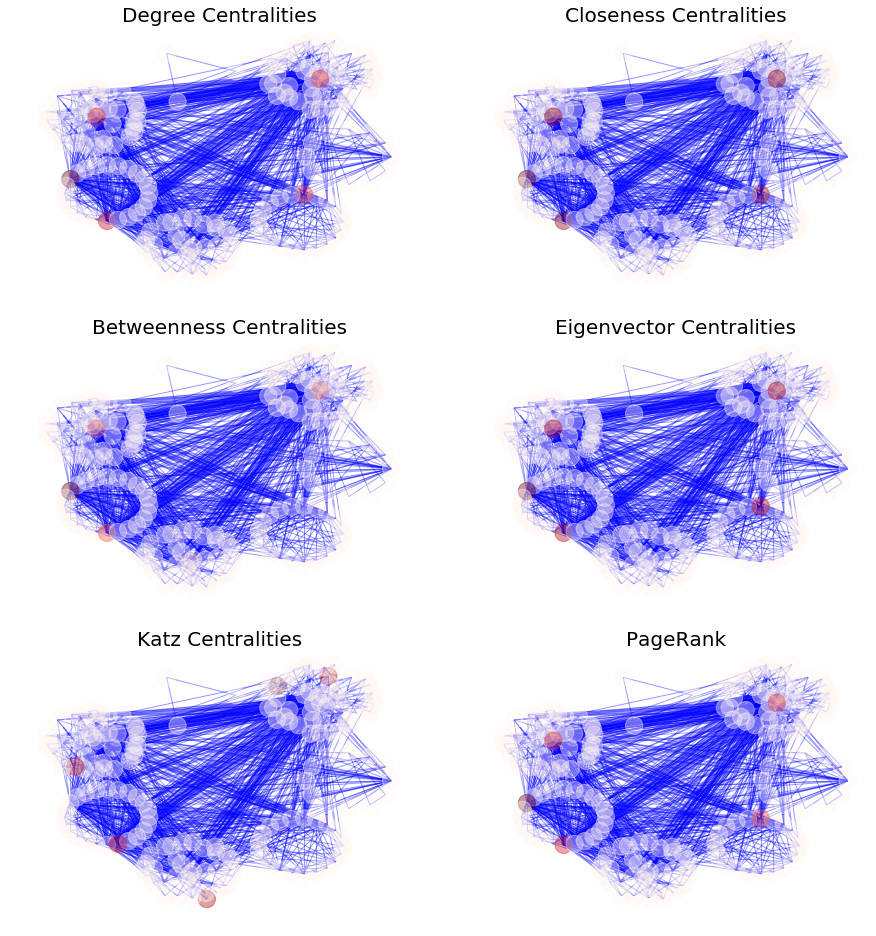

In [33]:
G1=nx.Graph(G)
draw_centralities_subplots(G1,posAll,withLabels=False,labfs=5,figsi=(15,22))

In [17]:
# %autoreload 2

# selectedTerms={}
# # excluded = ['who','will','exactly','enough','shall','suppose','well']
# for k in df["Deleuze's Difference and Repetition Essential Terms"].tolist(): #df["Plato's Phaedrus Noun Phrases"].tolist():
# #     if k not in excluded:
#     selectedTerms[k] = k #.capitalize()

# # tool= imp.load_source('tools', utilsdir+'/tools.py')
# create_pandas_dataframe_from_text=tool.create_pandas_dataframe_from_text  
# dfst,sec_prot,coccurlist,occurlist,dflines=create_pandas_dataframe_from_text(blob,selectedTerms,selectedTerms,titlename)
# # print len(sec_prot.nodes()), sec_prot.nodes()
# # dfst.sort_values(by='Frequencies').sort(["Frequencies"], ascending=[0])

# prot_pol_sub=dflines[['protagonists','#_of_protagonists','polarity','subjectivity']].reset_index()
# prot_pol_sub['sentence_id']=prot_pol_sub.index
# prot_pol_sub=prot_pol_sub[['sentence_id','protagonists','#_of_protagonists','polarity','subjectivity']]

# cuts = 1
# prot_pol_sub = prot_pol_sub[prot_pol_sub['#_of_protagonists']>cuts]
# # lp = prot_pol_sub['protagonists'].tolist()
# # lpn = []
# # control_dic={}
# # for i in lp:
# #     for j in i:
# #         lpn.append(j)
# #         if j not in control_dic:
# #             print j,'0, 1, 2'
# #             control_dic[j]=int(raw_input())
# # # print lpn
# # # print control_dic
# # # len(set(lpn))
# # for nd in sec_prot.nodes():
# #     if nd not in control_dic:
# #         continue
# #     dici=sec_prot.node[nd]
# #     sec_prot.add_node(nd,attr_dic=dici,type=control_dic[nd])
# print "The total number of sentences in %s with at least %i essential terms in each one of them is %i." %(titlename,cuts+1,len(prot_pol_sub))
# prot_pol_sub.rename(columns={'protagonists':'list_of_essential_terms','#_of_protagonists':'#_of_essential_terms'},inplace=True)
# prot_pol_sub.sort_values(["#_of_essential_terms"], ascending=[0]) #.drop('sentence_id', 1)
# ddff = prot_pol_sub.drop('sentence_id', 1)
# ddff.index.name = 'sentence_id'
# ddff

In [18]:
# actors=[]
# for i in ddff["list_of_essential_terms"].tolist():
# #     print i
#     for ii in i:
#         if ii not in actors:
#             actors.append(ii)
# print len(actors)
# print actors
# pactors=[a for a in actors if a[0].isupper()==False]
# nactors=[a for a in actors if a[0].isupper()==True]
# print len(pactors), len(nactors)

In [19]:
# ndfl=dflines[dflines['#_of_protagonists']>0  ]

# fig, ax = plt.subplots(figsize=[12, 10])
# axes2 = zoomed_inset_axes(ax, 6, loc=5)  # zoom = 6

# dflines['#_of_protagonists'].plot.hist(ax=ax)

# ax.set_xlabel('#_of_Characters')
# ax.set_ylabel('Frequency')
# ax.set_title('Histogram of # of essential terms')

# x1, x2, y1, y2 = 2.9, 3., 0, 25
# axes2.set_xlim(x1, x2)
# axes2.set_ylim(y1, y2)
# ndfl['#_of_protagonists'].plot.hist(ax=axes2)
# axes2.set_ylabel('Frequency')
# mark_inset(ax, axes2, loc1=2, loc2=4, fc="none", ec="0.5")

# axes3 = zoomed_inset_axes(ax, 6, loc=10)
# x1, x2, y1, y2 = 2.1, 2.2, 0, 150
# # x1, x2, y1, y2 = 2, 2.05, 0, 50
# axes3.set_xlim(x1, x2)
# axes3.set_ylim(y1, y2)
# ndfl['#_of_protagonists'].plot.hist(ax=axes3)
# axes3.set_ylabel('Frequency')
# mark_inset(ax, axes3, loc1=2, loc2=4, fc="none", ec="0.5")

# # axes4 = zoomed_inset_axes(ax, 6, loc=9)
# # x1, x2, y1, y2 = 1.0, 1.1, 0, 700
# # axes4.set_xlim(x1, x2)
# # axes4.set_ylim(y1, y2)
# # ndfl['#_of_protagonists'].plot.hist(ax=axes4)
# # axes4.set_ylabel('Frequency')
# # mark_inset(ax, axes4, loc1=2, loc2=4, fc="none", ec="0.5")

# plt.show()

In [20]:
# %autoreload 2

# draw_network_node_color=tool.draw_network_node_color
# sstt="%s Two-Mode Network of Sentences and Essential Terms" %titlename
# pos=nx.spring_layout(sec_prot)
# # pos=DefaultDict
# nds=[nd for nd in sec_prot.nodes() if isinstance(nd,int)]
# prot=[nd for nd in sec_prot.nodes() if nd not in nds]
# print len(prot)
# print prot
# # ncont=dict(control_dic)
# # print ncont
# # ncont[u'Midas']=0
# # prot.append('Midas')
# # protag=[nd for nd in prot if int(ncont[nd])==0 ]
# # pos={nd:{0:0,1:0} for nd in sec_prot}
# # nprotag=[nd for nd in prot if  int(ncont[nd])==1 or int(ncont[nd])==2]
# # print protag
# # print nprotag
# for en,nd in enumerate(nds):
#     if en<len(nds)/2.:
#         pos[nd][0]=-1
#         pos[nd][1]=en*2./len(nds)
#     else:
#         pos[nd][0]=1
#         pos[nd][1]=(en-len(nds)/2.)*2./len(nds)
# for en ,nd in enumerate(prot):
#     pos[nd][0]=0
#     pos[nd][1]=en*1./len(prot)
# # for en ,nd in enumerate(protag):
# #     pos[nd][0]=.5
# #     pos[nd][1]=en*1./len(protag)
# # for en ,nd in enumerate(nprotag):
# #     pos[nd][0]=-.5
# #     pos[nd][1]=en*1./len(nprotag)
# # print pos    
# possit=draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=12,valpha=0.2,
#                                ealpha=0.4,labelfont=15,with_node_weight=False,node_size_fixer=300.,node_col='polarity')

In [21]:
# possit=draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=12,valpha=0.2,
#                                ealpha=0.4,labelfont=15,with_node_weight=False,node_size_fixer=300.,
#                                node_col='subjectivity',colormat='Greens')

## III. Constructing the Network of Sententially Co-Occurring Noun Phrases in Deleuze's *Difference and Repetition*

In [22]:
# %autoreload 2

# plist = prot_pol_sub['list_of_essential_terms'].tolist()
# pplist=prot_pol_sub['polarity'].tolist()
# nplist=prot_pol_sub['#_of_essential_terms'].tolist()
# splist=prot_pol_sub['subjectivity'].tolist()

# G = tool.make_graph_from_lists(plist,pplist,nplist,splist)
# # print G.nodes(data=True)
# # for nd in G.nodes():
# #     G.add_node(nd,type=control_dic[nd])
# print len(G.nodes())
# posg=nx.spring_layout(G,scale=50)#,k=0.55)#,iterations=20)
# # nodescolor={}
# # npos={}
# # d=40
# # for nd in G.nodes():
# #     opos=posg[nd]

# #     if nd in protag:
# #         nodescolor[nd]='r'
# #         npos[nd]=[opos[0],opos[1]-d]
# #     else:
# #         nodescolor[nd]='g'
# #         npos[nd]=[opos[0],opos[1]+d]
# # npos={v:k for v,k in pos.items() if v in G}        

# # sstt="%s Network of Selected Noun Phrases \n(Assortativity coefficient of Persons - Entities = %.4f)" %(titlename,nx.attribute_assortativity_coefficient(G,'type'))
# sstt="%s Network of Selected Noun Phrases \n(Sentences colored in polarity)" %titlename
# possit=tool.draw_network(G,sstt,pos=posg,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15,
#                    with_edgecolor=True,edgecolor='polarity',colormat='Blues') #npos ,node_col=nodescolor False

In [23]:
# sstt="%s Network of Selected Noun Phrases \n(Sentences colored in subjectivity)" %titlename
# possit=tool.draw_network(G,sstt,pos=posg,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15,
#                    with_edgecolor=True,edgecolor='subjectivity',colormat='Greys')

## IV. Centralities of Nodes in the Network of Sententially Co-Occurring Noun Phrases in Deleuze's *Difference and Repetition*

NetworkXNotImplemented: not implemented for multigraph type

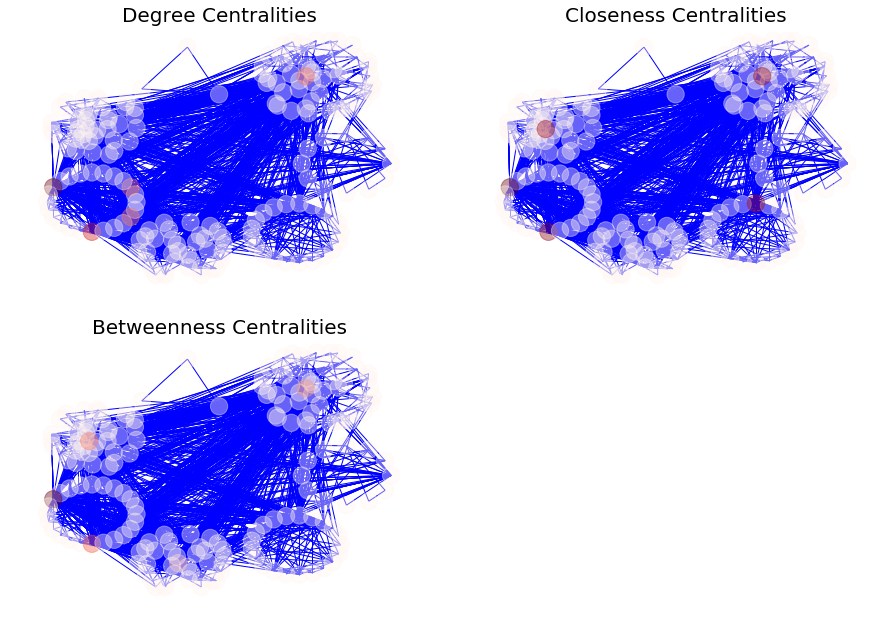

In [24]:
centrali=tool.draw_centralities_subplots(G,pos=posAll,withLabels=False,labfs=5,figsi=(15,22),ealpha=1,vals=True)

### The table of Centralities of Nodes in the Network of Sententially Co-Occurring Noun Phrases in Deleuze's *Difference and Repetition*

In [ ]:
dfc=pd.DataFrame()
u=0
for i,k in centrali.items():
    dfc.insert(u,i,k.values())
    u+=1
dfc.insert(0,'Nodes',centrali[centrali.keys()[0]].keys())
# dfc
# dfc.insert(0,'Nodes',centrali[centrali.keys()[0]].keys())
dfc.columns=['Nodes','Closeness_Centrality', 'Katz_Centrality','Betweenness_Centrality', 'PageRank', 'Eigenvector_Centrality','Degree_Centrality']
dfc=dfc[['Nodes','Degree_Centrality','Closeness_Centrality','Betweenness_Centrality','Eigenvector_Centrality','Katz_Centrality','PageRank']]

# cols = list(dfc.columns.values)
# print "Centralities of nodes of %s sorted by closeness and betweenness centralities:" %name 
# print
dfc.sort_values(['Betweenness_Centrality','Closeness_Centrality'], ascending=[0,0])

## V. Communities of Nodes in the Network of Sententially Co-Occurring Noun Phrases in Deleuze's *Difference and Repetition*

In [ ]:
# %autoreload 2

# part,nodper=tool.print_communities(G,sstt)

# d=0.8 
# dd=0.8
# c=1.2
# cc=1.4
# alpha=0.2
# ealpha=0.2
# vcc={}
# sstta="The %s Communities of %s Network of Selected Noun Phrases" %(max(part.values())+1,titlename)#sstt)

# tool.draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=17,valpha=0.5)